## Binary Classification

Consider the prediction of a binary outcome (0,1)/(failure,success) $Y$ using predictor variables $x=(x_1,\ldots,x_k).$ 

We will try to use data consisting of pairs $(x^{(i)},Y^{(i)})$ to build a prediction modelP which we can take to be a map from $C: \mathbb{R}^k \rightarrow \{0,1\},$ so that when we observe $x$ we can take $C(x)$ as outhat is a map r predictor of the corresponding $Y.$ 

Alternatively, we can build a predictor that is a map $P: \mathbb{R}^k \rightarrow [0,1],$ with the interpretation that when we observe $x$ we take $P(x)$ to be the probability of $Y=1,$ or at least we can think of $P(x)$ as telling us the strength of evidence that $Y=1.$ Similarly, we can view $1-P(x)$ as the probability that $Y=0,$ or the strength of the evidence in favor of $Y=0.$

In this latter situation, we obtain a classifier in the former sense, by picking a threshold $\tau$ and taking $C(x)=1$ if $P(x)\geq \tau$ and $C(x)=0$ otherwise.  Thus, $P$ can be viewed as defining a family of classifiers indexed by $\tau.$


# Logistic Regression — Notes

---

## **1. Setup**

We observe:

- A binary response variable  
  $$
  Y \in \{0,1\}
  $$
- Explanatory variables  
  $$
  x = (x_1, \ldots, x_k)
  $$  
  (one component may be constant $1$ for an intercept)

Define a linear predictor:
$$
L_\beta(x) = \sum_{j=1}^k \beta_j x_j
$$

Let
- $p_\beta(x) = P(Y=1\mid x)$  
- $1 - p_\beta(x) = P(Y=0\mid x)$

---

## **2. Odds and the Logistic Transformation**

Modeling $p_\beta(x)$ directly as linear is invalid since probabilities must lie in $(0,1)$.

Instead use the **log-odds**:

$$
\psi(p) = \log\left(\frac{p}{1-p}\right)
$$

This maps $(0,1)$ → $\mathbb{R}$, is strictly increasing, and invertible.

We assume:

$$
\log\left(\frac{p_\beta(x)}{1 - p_\beta(x)}\right) = L_\beta(x)
$$

Equivalently,

$$
p_\beta(x)
= \frac{1}{1 + e^{-L_\beta(x)}}
$$

This is the **logistic model**.

---

## **3. Derivatives of $p_\beta(x)$**

We will need:

$$
\frac{\partial p_\beta(x)}{\partial \beta_j}
= x_j\, p_\beta(x)\,(1 - p_\beta(x))
$$

This is very useful in optimization.

---

## **4. Probability Mass Function**

For $Y \in \{0,1\}$:

$$
P(Y = y \mid x) = p_\beta(x)^y \, (1 - p_\beta(x))^{1-y}
$$

Taking logs:

$$
\log P(Y=y\mid x)
= y\log(p_\beta(x)) + (1-y)\log(1-p_\beta(x))
$$

Derivative of log-likelihood for one observation:

$$
\frac{\partial}{\partial \beta_j} \log P(Y=y\mid x)
= (y - p_\beta(x)) x_j
$$

Second derivative (Hessian entry):

$$
\frac{\partial^2}{\partial\beta_s\partial\beta_j}
\log P(Y=y\mid x)
=
- x_j x_s \, p_\beta(x) \, (1 - p_\beta(x))
$$

---

## **5. Likelihood for $N$ Observations**

Data:  
$(x^{(s)}, y^{(s)})$ for $s = 1,\ldots,N$.

Assume conditional independence of $Y^{(s)}$ given $x^{(s)}$.

Likelihood:

$$
\ell(\beta)
=
\prod_{s=1}^N
p_\beta(x^{(s)})^{y^{(s)}}
(1 - p_\beta(x^{(s)}))^{1-y^{(s)}}
$$

Log-likelihood:

$$
\log \ell(\beta)
=
\sum_{s=1}^N
\left[
y^{(s)}\log(p_\beta(x^{(s)}))
+
(1-y^{(s)})\log(1-p_\beta(x^{(s)}))
\right]
$$

Gradient:

$$
\frac{\partial}{\partial\beta_i} \log \ell(\beta)
=
\sum_{s=1}^N
\bigl(y^{(s)} - p_\beta(x^{(s)})\bigr)\,
x_i^{(s)}
$$

Setting gradient to zero gives the MLE equations:

$$
\sum_{s=1}^N
y^{(s)} x_i^{(s)}
=
\sum_{s=1}^N
p_\beta(x^{(s)}) x_i^{(s)}
$$

Hessian:

$$
\frac{\partial^2}{\partial\beta_j\partial\beta_i}
\log\ell(\beta)
=
-\sum_{s=1}^N
x_i^{(s)} x_j^{(s)}
p_\beta(x^{(s)})(1 - p_\beta(x^{(s)}))
$$

---

## **6. Concavity and Newton’s Method**

The log-likelihood is **concave** (and usually strictly concave), so maximizing it is well-behaved.

Newton’s method:

1. Start with some $\beta^*$.
2. Use second-order Taylor approximation:
   $$
   \ell(\beta) \approx \ell(\beta^*) + 
   \nabla \ell(\beta^*) + 
   \frac12 (\beta - \beta^*)^\top H(\beta^*) (\beta - \beta^*)
   $$

3. The maximizer of this quadratic approximation is:
   $$
   \beta_{\text{new}}
   = 
   \beta^* - H(\beta^*)^{-1}\nabla\ell(\beta^*)
   $$

Repeat until convergence (e.g., gradient norm small).

---

## **7. Why the Log-Likelihood is Concave**

Define weights:

$$
w_s = p_\beta(x^{(s)})\,(1 - p_\beta(x^{(s)})) > 0
$$

Then:

$$
- H
=
\sum_{s=1}^N
w_s\, x^{(s)\top} x^{(s)}
= U^\top U
$$

where $U$ has rows  
$\sqrt{w_s} x^{(s)}$.

Properties:

- $U^\top U$ is always **nonnegative definite** → log-likelihood is concave.
- If the columns of $U$ are linearly independent,  
  $U^\top U$ is **positive definite** → log-likelihood is strictly concave → MLE is unique.

This is a standard fact: if $X$ is $N\times k$,  
then $X^\top X$ is nonnegative definite, and positive definite if $X$ has full column rank.

---

## Logistic Regression

The logistic regression model is an example of a _generalized linear model_ where we assume that, given the covariate values, the expected value of the response variable and its variance are both functions of a specific linear function of covariates.

Assume we have sample data consisting of pairs $(x^{(i)},y^{(i)}),$ for $i=1,\ldots,n,$ where each $x^{(i)} = (x^{(i)}_1,x^{(i)}_2,\ldots,x^{(i)}_k)$ is a vector of $k$ covariates and $y^{(i)}$ is 0/1-valued.

We think of our observations as distributed as pairs $(X,Y)$ sampled from some joint distribution. In other words, we can think of there being a conditional distribution of $X$ given $Y=0$ and conditional distribution of $X$ given $Y=1$ and a marginal distribution of $Y.$

We let $p_1(x)$ denote the conditional probability of $Y=1$ given $X=x,$ and let $p_0(x)=1-p_1(x)$ denote the conditional probability that $Y=0$ given $X=x.$

The logistic regression model says that the log odds ratio is a linear function of the predictors
$$ \log(p_1(x)/p_0(x)) = L(x_1,\ldots,x_k),$$
where $$ L( x_1 , \ldots , x_k) = \beta_0 + \beta_1 x_1 + \ldots + \beta_k x_k.$$
This leads to 
$$ E[Y|x] = p_1(x) = \frac{1}{1+\exp \{ -L(x_1,\ldots,x_k)\}}$$
and 
$$ E[1-Y|x] = p_0(x) =\frac{\exp \{ -L(x_1,\ldots,x_k)\}}{1+\exp \{ -L(x_1,\ldots,x_k)\}}$$



Using these estimates, we obtain for each observation in our test set an estimate of the linear term
$$ \hat{L} = \hat{\beta}_0 + \hat{\beta_1}x_1 + \ldots + \hat{\beta}_k x_k $$
which leads to an estimate of the probability
$$ \hat{p}_1 = \frac{1}{1+\exp(-\hat{L})}.$$


To evaluate performance of our classifiers we first pretend we don't know the classes ($Y$'s) in our test set, use the covariates and the fitted model to do prediction, which gives us a prediction $\hat{Y}$ for observation in our test set.  Then we compare the predicted values $\hat{Y}$ to the actual values and quantify how well these predictions do.

We typically *classify* an observation in our test set by picking a threshold $\tau$ and predict the observation as a 1 if $\hat{p}_1 > \tau.$

##  Classification in scikitlearn

As an example we look at the data from this uri:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Banknote features are analyzed using imaging techniques leading to 4 features:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Variables:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [2]:
import pandas as pd
import numpy as np
import os


cnames=["var","skew","kurt","ent","Y"]
df=pd.read_csv("data_banknote_authentication.txt",header=None,names=cnames)
N,K=df.shape
print("N="+str(N)+" K="+str(K))
print(df.Y.value_counts())
df.head()

N=1372 K=5
Y
0    762
1    610
Name: count, dtype: int64


,var,skew,kurt,ent,Y
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Break up our data set into a training set and test set by randomly selecting around 80% of the rows for training and 20% for testing.

In [3]:
I=np.random.permutation(range(N))
Itest=I[0:int(N/20)]
Itrain=I[int(N/20):N]
dftrain=df.iloc[Itrain]
dftest=df.iloc[Itest]
print(dftrain.shape)
print(dftrain.columns)
Xtrain=dftrain.loc[:,["var","skew","kurt","ent"]]
Xtest=dftest.loc[:,["var","skew","kurt","ent"]]
Ytrain=dftrain.Y
Ytest=dftest.Y

(1304, 5)
Index(['var', 'skew', 'kurt', 'ent', 'Y'], dtype='object')


Fit the model to the training set.

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(Xtrain,Ytrain)

Get prediction results for the test set. We can get 0's and 1's using the predict method.

In [5]:
Ypred=clf.predict(Xtrain)

Better yet, we can get prediction probabilities. The result is two columns:
- column 0 gives the predicted probability of a 0
- column 1 gives the predicted probability of a 1

In [6]:
Ypred=clf.predict_proba(Xtest)
print(Ypred.shape)
print(Ypred)

(68, 2)
[[1.53321114e-02 9.84667889e-01]
 [7.77229344e-06 9.99992228e-01]
 [1.01971033e-01 8.98028967e-01]
 [4.80328976e-06 9.99995197e-01]
 [4.49389511e-04 9.99550610e-01]
 [9.99997005e-01 2.99541785e-06]
 [9.99999790e-01 2.09771241e-07]
 [7.06653442e-04 9.99293347e-01]
 [4.26711814e-02 9.57328819e-01]
 [9.99997783e-01 2.21727145e-06]
 [1.71906443e-01 8.28093557e-01]
 [2.03264196e-03 9.97967358e-01]
 [9.99999999e-01 9.75757238e-10]
 [9.99937319e-01 6.26807494e-05]
 [2.22838818e-04 9.99777161e-01]
 [9.99999795e-01 2.05302765e-07]
 [9.99999979e-01 2.07450736e-08]
 [9.99999976e-01 2.43753978e-08]
 [8.07739711e-02 9.19226029e-01]
 [5.11667320e-05 9.99948833e-01]
 [9.91811566e-01 8.18843388e-03]
 [1.87123760e-03 9.98128762e-01]
 [1.18753783e-02 9.88124622e-01]
 [9.99999770e-01 2.30216479e-07]
 [4.65931014e-05 9.99953407e-01]
 [9.99999978e-01 2.16854834e-08]
 [9.99999770e-01 2.30186082e-07]
 [9.83455492e-01 1.65445075e-02]
 [7.91537716e-01 2.08462284e-01]
 [4.16082585e-02 9.58391742e-01]
 [

We can also get log probabilities:

In [7]:
Ypred_log_prob=clf.predict_log_proba(Xtest)
print(Ypred_log_prob)

[[-4.17780587e+00 -1.54508636e-02]
 [-1.17649453e+01 -7.77232365e-06]
 [-2.28306650e+00 -1.07552954e-01]
 [-1.22462095e+01 -4.80330130e-06]
 [-7.70762054e+00 -4.49490517e-04]
 [-2.99542234e-06 -1.27184268e+01]
 [-2.09771262e-07 -1.53772482e+01]
 [-7.25497019e+00 -7.06903239e-04]
 [-3.15423150e+00 -4.36083534e-02]
 [-2.21727391e-06 -1.30192332e+01]
 [-1.76080489e+00 -1.88629139e-01]
 [-6.19841887e+00 -2.03471058e-03]
 [-9.75757253e-10 -2.07478073e+01]
 [-6.26827140e-05 -9.67745618e+00]
 [-8.40906184e+00 -2.22863650e-04]
 [-2.05302786e-07 -1.53987800e+01]
 [-2.07450739e-08 -1.76909570e+01]
 [-2.43753980e-08 -1.75296915e+01]
 [-2.51610050e+00 -8.42232360e-02]
 [-9.88042100e+00 -5.11680410e-05]
 [-8.22214325e-03 -4.80503262e+00]
 [-6.28115525e+00 -1.87299055e-03]
 [-4.43328807e+00 -1.19464539e-02]
 [-2.30216506e-07 -1.52842458e+01]
 [-9.97405807e+00 -4.65941868e-05]
 [-2.16854836e-08 -1.76466228e+01]
 [-2.30186108e-07 -1.52843778e+01]
 [-1.66828964e-02 -4.10170110e+00]
 [-2.33777750e-01 -1

Do a side by side box plot giving prediction probablities for the true 0's and the true 1's.

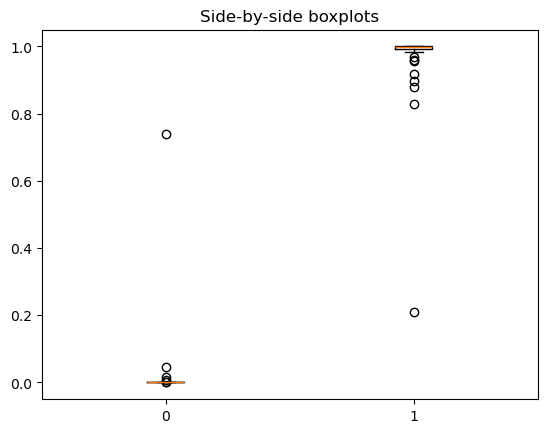

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = Ypred[Ytest==0,1]
y = Ypred[Ytest==1,1]

# Side-by-side boxplots
plt.boxplot([x, y], tick_labels=['0', '1'])
plt.title("Side-by-side boxplots")
plt.show()

**Introduction to Patsy**

We can create models to fit using formulas (like we see in R). 

The formula defines something we refer to in linear models as a *design matrix* which is the matrix of predictors.

This has a couple of advantages:
- equations have clear interpretation
- changing models is relatively easily

## ROC Curves

When we build a classifier that gives a probability of success for each $x,$ the performance of the classifier depends on the choice of a threshold for deciding to predict success. In this situation it is common to summarize the performance of the classifier by plotting its true positive rate as a function of its false positive rate.


ROC curves with higher values are preferred. 

What happens if we simply flip a biased coin (independently of the true $Y$) with probability of success $p$ to come up with $\hat{Y}$ to predict $Y$?

By independence, 

$$ FPR = P(\hat{Y}=1\vert Y=0) = P(\hat{Y}=1) = p $$

and

$$ TPR = P(\hat{Y}=1\vert Y=1) = P(\hat{Y}=1) = p. $$

So as we vary $p$ the _random guessing_ classifier gives rise to the $TPR=FPR$ ROC curve, shown in red above.

## Area under the ROC curve (AUC)

The area under the ROC curve gives a single number desribing the performance of a classifier.

## Decision Trees in Sklearn

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=25)
clf = clf.fit(Xtrain,Ytrain)

In [12]:
ptrain=clf.predict_proba(Xtrain)[:,1] # in sample data
ptest=clf.predict_proba(Xtest)[:,1] # out of sample data

In [13]:
import numpy as np
from sklearn import metrics

fpr1, tpr1, thresholds = metrics.roc_curve(list(Ytrain), list(ptrain))
fpr2, tpr2, thresholds = metrics.roc_curve(list(Ytest), list(ptest))

We plot the ROC curve obtained on the training data and the test data.
So the same data are used to train and produce an ROC curve!

/var/folders/38/22n3rn6s7gjdhyf__np8757r0000gn/T/ipykernel_40905/1180844540.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


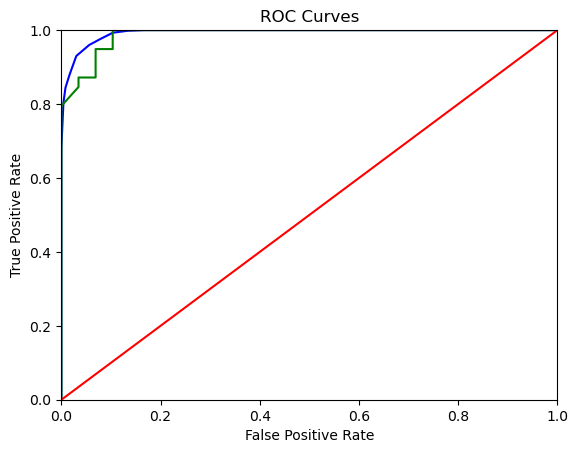

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart,lineEnd=0,1
plt.plot(fpr1,tpr1,color="b")
plt.plot(fpr2,tpr2,color="g")
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

# Random Forest Classifier

This is an *ensemble* method in which we repeatedly

- draw a random subset of features
- build a low depth decision tree classifier based on the observations & features

then the individual classifies *vote* to make a classification decision.

If we use the *bootstrap=True* option, in each repetition we draw a sample of observations with replacement to give a dataset whose sample size is the same as the dataset used to train the classifier.

In [16]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

cnames=["var","skew","kurt","ent","Y"]
df=pd.read_csv("data_banknote_authentication.txt",header=None,names=cnames)
N,K=df.shape
print("N="+str(N)+" K="+str(K))
print(df.Y.value_counts())

X=df.loc[:,cnames[0:4]]
Y=df.loc[:,"Y"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=.8,random_state=0)
print(Xtrain.shape[0])
print(Xtest.shape[0])

N=1372 K=5
Y
0    762
1    610
Name: count, dtype: int64
1097
275


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=3, max_features=2,random_state=0,n_estimators=100)
fit=clf.fit(Xtrain, Ytrain)
Ypred=fit.predict(Xtest)
pd.crosstab(Ytest,Ypred)

col_0,0,1
Y,,
0,150,7
1,6,112


In [18]:
fit.predict_proba(Xtest)

array([[0.07318025, 0.92681975],
       [0.9158006 , 0.0841994 ],
       [0.08833254, 0.91166746],
       [0.78024842, 0.21975158],
       [0.87291784, 0.12708216],
       [0.84696433, 0.15303567],
       [0.88178038, 0.11821962],
       [0.90683082, 0.09316918],
       [0.06458681, 0.93541319],
       [0.16184908, 0.83815092],
       [0.85195236, 0.14804764],
       [0.98203363, 0.01796637],
       [0.05489003, 0.94510997],
       [0.98203363, 0.01796637],
       [0.97756441, 0.02243559],
       [0.98203363, 0.01796637],
       [0.0621845 , 0.9378155 ],
       [0.19302164, 0.80697836],
       [0.9158006 , 0.0841994 ],
       [0.98203363, 0.01796637],
       [0.06271262, 0.93728738],
       [0.9158006 , 0.0841994 ],
       [0.98203363, 0.01796637],
       [0.10803957, 0.89196043],
       [0.86996403, 0.13003597],
       [0.19288369, 0.80711631],
       [0.97900766, 0.02099234],
       [0.06364787, 0.93635213],
       [0.90553321, 0.09446679],
       [0.93382335, 0.06617665],
       [0.